In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from LR import LinearRegression

## Exploratory Data Analysis (EDA)

In [2]:
data = pd.read_csv('500_Person_Gender_Height_Weight_Index.csv')
data = data.drop("Gender", axis=1)
data.head()

,Height,Weight,Index
0,174,96,4
1,189,87,2
2,185,110,4
3,195,104,3
4,149,61,3


In [3]:
data.describe()

,Height,Weight,Index
count,500.000000,500.000000,500.000000
mean,169.944000,106.000000,3.748000
std,16.375261,32.382607,1.355053
min,140.000000,50.000000,0.000000
25%,156.000000,80.000000,3.000000
50%,170.500000,106.000000,4.000000
75%,184.000000,136.000000,5.000000
max,199.000000,160.000000,5.000000


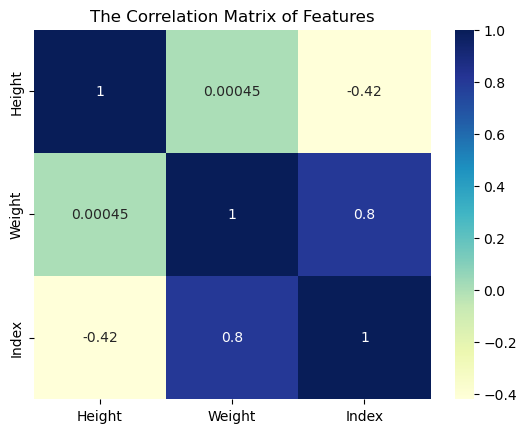

In [4]:
matrix = data.corr()
sns.heatmap(matrix, annot=True, cmap='YlGnBu')
plt.title('The Correlation Matrix of Features')
plt.show()

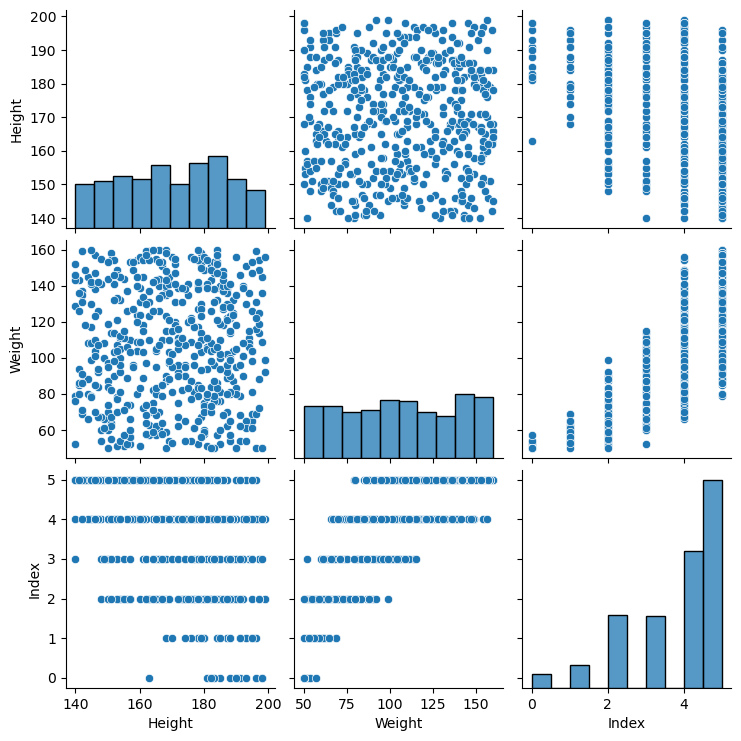

In [5]:
sns.pairplot(data.loc[:, ['Height', 'Weight', 'Index']])
plt.show()

Text(0.5, 1.0, 'Height Distribution')

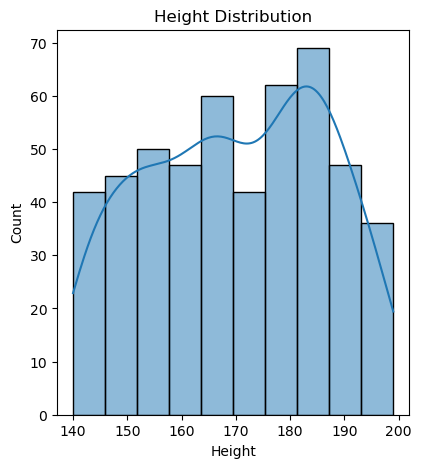

In [6]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data["Height"], kde=True)
plt.xlabel("Height")
plt.title("Height Distribution")

Text(0.5, 1.0, 'Weight Distribution')

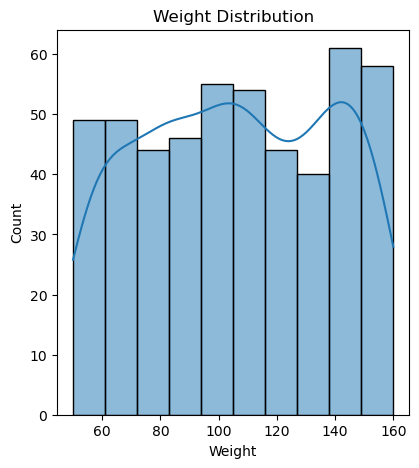

In [7]:
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
sns.histplot(data["Weight"], kde=True)
plt.xlabel("Weight")
plt.title("Weight Distribution")

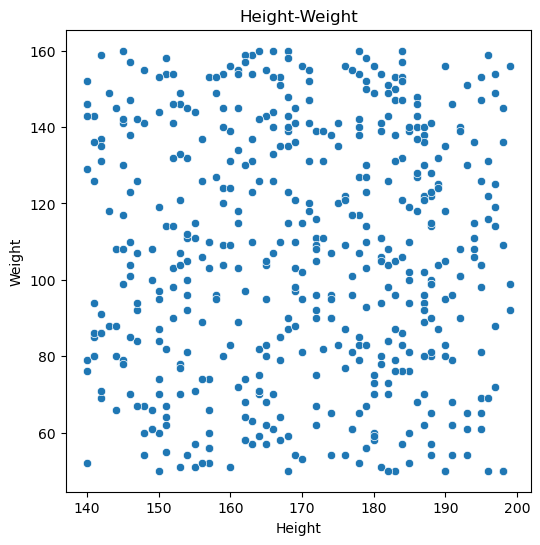

In [8]:
plt.figure(figsize=(6, 6))
sns.scatterplot(x="Height", y="Weight", data=data)
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height-Weight")
plt.show()

## Train the Classifier


In [9]:
lr = LinearRegression(learning_rate=0.000005, epoch=1000)

In [10]:
X = data.values.tolist()
y = []

for row in X:
    y.append(int(row[2]))
    del row[2]
    
X = pd.Series(X)
y = pd.Series(y)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.5, shuffle=True)

X_train_list = x_train.values.tolist()
y_train_list=y_train.values.tolist()
X_test_list=x_test.values.tolist()
y_test_list=y_test.values.tolist()

In [11]:
x_train = [sublist[0] for sublist in X_train_list]
y_train = [sublist[1] for sublist in X_train_list]
z_train = y_train_list

x_test = [sublist[0] for sublist in X_test_list]
y_test = [sublist[1] for sublist in X_test_list]
z_test = y_test_list

In [12]:
lr.fit(x_train, y_train, z_train)

Epoch: 0
coeff 1: 1, coeff 2: 2, constant: 0
Epoch: 50
coeff 1: -0.4140654571525574, coeff 2: 0.6772336189194014, constant: -0.008536714145641807
Epoch: 100
coeff 1: -0.28529156667097527, coeff 2: 0.47754112760707973, constant: -0.00798271695653313
Epoch: 150
coeff 1: -0.19667677047380175, coeff 2: 0.34012414881271397, constant: -0.007593272658731868
Epoch: 200
coeff 1: -0.13569717033365838, coeff 2: 0.24556162249992833, constant: -0.007317064300116048
Epoch: 250
coeff 1: -0.09373453446095738, coeff 2: 0.18048908387782367, constant: -0.007118778483837168
Epoch: 300
coeff 1: -0.06485828774219322, coeff 2: 0.13570987123790626, constant: -0.00697411454618167
Epoch: 350
coeff 1: -0.04498734695337792, coeff 2: 0.10489536701832176, constant: -0.006866350157676294
Epoch: 400
coeff 1: -0.031313343603706884, coeff 2: 0.08369057790587416, constant: -0.0067839779658343076
Epoch: 450
coeff 1: -0.02190371882405806, coeff 2: 0.06909864612355113, constant: -0.006719079267614588
Epoch: 500
coeff 1: -0

In [13]:
test_predictions = [int(x) for x in lr.predict(x_test, y_test)]
train_predictions = [int(x) for x in lr.predict(x_train, y_train)]

In [14]:
print("Test Features Expected Classification")
print(z_test)
print("Prediction")
print(test_predictions)

print("Train Features Expected Classification")
print(z_train)
print("Prediction")
print(train_predictions)

Test Features Expected Classification
[5, 5, 5, 3, 0, 3, 5, 4, 3, 5, 3, 3, 5, 5, 5, 5, 1, 0, 5, 5, 5, 5, 4, 2, 5, 4, 5, 5, 5, 4, 4, 4, 3, 2, 5, 4, 5, 1, 1, 5, 1, 4, 5, 3, 2, 5, 4, 4, 4, 1, 4, 4, 4, 2, 4, 0, 1, 5, 3, 5, 4, 0, 5, 4, 4, 5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 3, 4, 5, 5, 2, 2, 2, 3, 5, 4, 5, 5, 3, 5, 5, 2, 2, 0, 5, 2, 5, 2, 3, 2, 3, 5, 5, 4, 1, 5, 4, 4, 4, 2, 5, 4, 5, 5, 5, 4, 5, 5, 0, 3, 5, 4, 0, 5, 4, 3, 4, 0, 4, 5, 2, 3, 5, 1, 5, 2, 4, 5, 1, 5, 3, 2, 5, 4, 5, 5, 4, 4, 4, 0, 4, 2, 5, 1, 5, 4, 4, 4, 2, 4, 2, 5, 5, 3, 4, 5, 1, 1, 5, 2, 5, 5, 3, 4, 5, 3, 2, 2, 3, 5, 5, 5, 5, 5, 3, 4, 2, 3, 5, 5, 4, 3, 4, 5, 5, 2, 5, 5, 5, 2, 5, 5, 5, 2, 5, 4, 4, 5, 4, 4, 4, 3, 3, 5, 2, 3, 1, 2, 3, 4, 5, 2, 5, 4, 5, 4, 2, 2, 5, 1, 4, 4, 5, 2, 5, 2, 4, 5, 4, 4, 4, 4, 4, 5, 4, 0, 5, 4, 3, 3, 1]
Prediction
[5, 4, 5, 2, 1, 3, 5, 4, 2, 5, 2, 2, 4, 5, 4, 3, 1, 1, 3, 4, 4, 5, 4, 1, 5, 3, 5, 4, 5, 4, 2, 3, 3, 3, 5, 3, 4, 1, 1, 4, 1, 4, 5, 3, 1, 5, 3, 3, 4, 1, 4, 3, 2, 2, 4, 1, 2, 4, 3, 2, 4, 1, 3, 4, 3, 4, 3

## Results

In [15]:
def loss_function(predictions, z_test):
     test_loss = []
        
     for i in range(len(z_train)):
          error = (z_test[i] - predictions[i]) ** 2
          test_loss.append(error)

     return test_loss

In [16]:
train_loss = lr.train_losses
test_loss = loss_function(test_predictions, z_test)

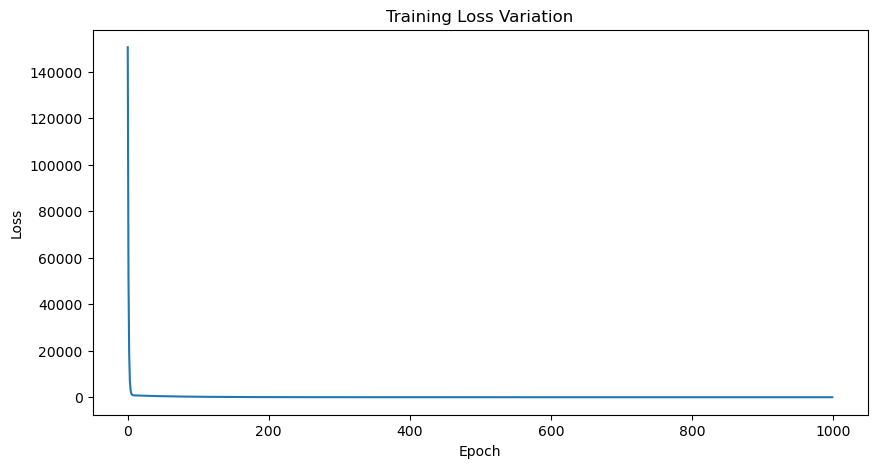

In [17]:
plt.figure(figsize=(10, 5))
plt.plot(train_loss)
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.title("Training Loss Variation")
plt.show()

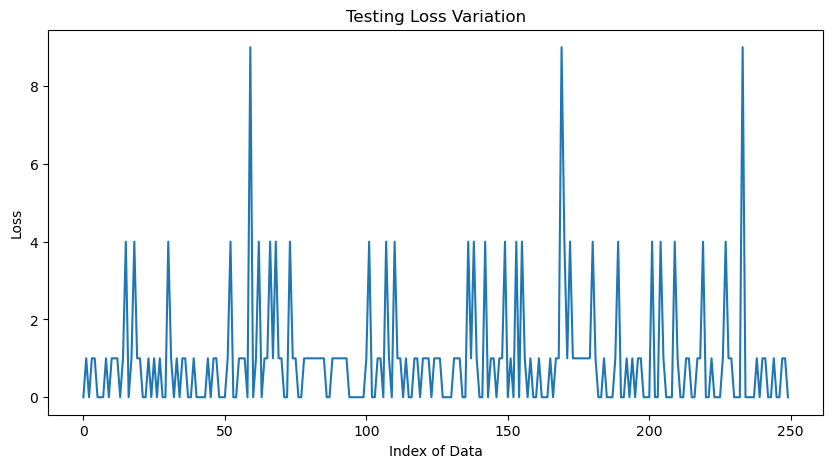

In [18]:
plt.figure(figsize=(10, 5))
plt.plot(test_loss)
plt.xlabel("Index of Data")
plt.ylabel("Loss")
plt.title("Testing Loss Variation")
plt.show()

In [23]:
def r2_score(y_true, y_pred):
        residual_sum_of_squares = (y_true - y_pred) ** 2

        r2 = 1 - (residual_sum_of_squares)
        return r2

In [24]:
test_accuracy = []
for i in range(len(z_test)):
    test_accuracy.append(r2_score(z_test[i], test_predictions[i]))

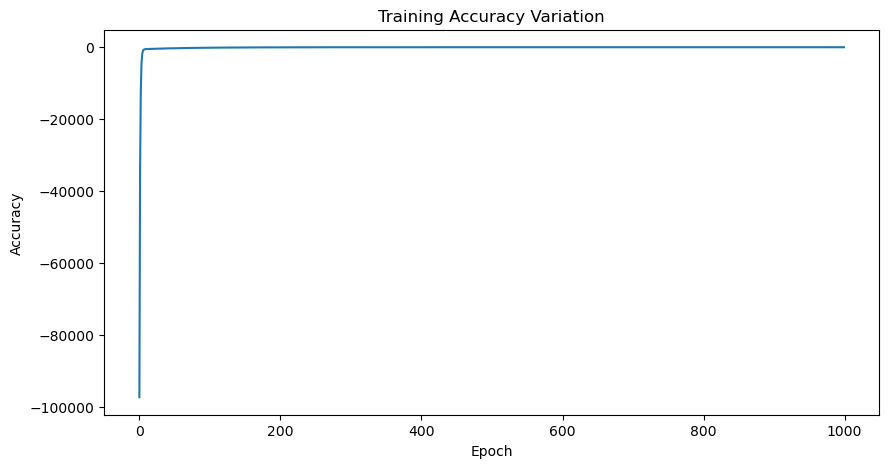

In [25]:
train_accuracy = lr.train_r2_scores
plt.figure(figsize=(10, 5))
plt.plot(train_accuracy)
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Training Accuracy Variation")
plt.show()

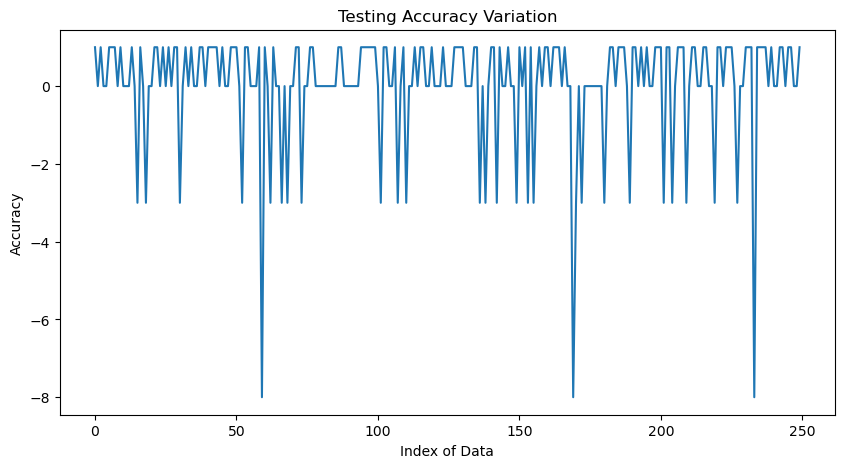

In [30]:
plt.figure(figsize=(10, 5))
plt.plot(test_accuracy)
plt.xlabel("Index of Data")
plt.ylabel("Accuracy")
plt.title("Testing Accuracy Variation")
plt.show()

When the training loss is analysed, it is seen that it decreases as the number of epochs increases. This is an expected situation. In the test data, there is no specific trend since the error value is calculated separately for each data.

R2-Score was used as an accuracy measure here. When we talk about the accuracy graph, since R2-Score is used as a criterion, the accuracy increases as the epoch increases in the training phase. In the test part, since the accuracy value of each data is calculated separately, there is no specific trend.